A menudo los cambios que queremos hacerle a los datos no están específicamente tratados por los métodos incorporados de Pandas.  Pandas también nos deja definir nuestras propias funciones para que se apliquen en las características.  Si definimos una función que cambia una entrada en otra, podemos utilizar Series.apply() para aplicar esa función en cada valor en una característica.

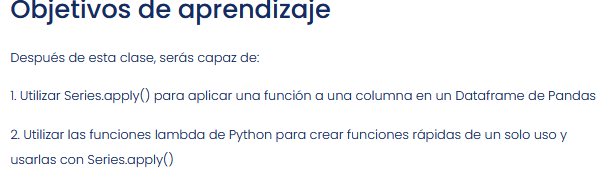

In [2]:
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vReZBM5OC6GLYbacisp_ToNiu3CLWxqPXw7mWBsdRjnYOFLWNufdQ4qd8u5qTzUF2_sBUAMEi5cgy1U/pub?gid=1040198428&single=true&output=csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Transformar las características con .apply()

Digamos que, en lugar de un valor flotante para el valor de precio, queremos clasificar estos valores en pasajes "caros" y "baratos".  Podemos encontrar el precio medio de pasajes y cambiar cada valor de precio sobre ese precio a “caro”, y cada valor bajo ese precio a “barato”.

Es posible que escribamos una función para eso.  La función trabajaría como si se le pasara un solo valor (no un array entero).

In [8]:
# find the median fare price
median_fare = df['Fare'].median()
# define a function that returns 'Expensive' or 'Cheap'
def bin_fare(fare):
  if fare > median_fare:
    return 'Expensive'  
  else:    
    return 'Cheap'

Definimos “median_fare” fuera de la función, pero eso está bien porque Python buscará un alcance global para esa variable si no se pasa a un argumento y está disponible en el ámbito local de la función.  Ten en cuenta que “bin_fare” solo toma un solo valor.

series.apply() aplicará una función a cada valor en una serie.  Ten en cuenta que no utilizamos paréntesis cuando pasamos una función.

In [9]:
# apply bin_fare() function to each item in the 'Fare' column
df['Fare'] = df['Fare'].apply(bin_fare)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,Cheap,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,Expensive,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,Cheap,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,Expensive,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,Cheap,NaN,S


## Funciones de lambda

Las funciones de lambda pueden simplificar nuestro código al crear funciones de un solo uso.  En el ejemplo anterior escribimos una nueva función solo para transformar esa columna, y es probable que no utilizaremos esa función en ningún otro lugar.  Una función lambda es una forma de crear una función temporal con menos código.

Digamos que queremos hacer el mismo tipo de agrupación, pero solo queremos agrupar la columna “Age”.  Puede que decidamos que todos lo que tengan más de 30 son “mayores” y los que tengan menos de 30 son “jóvenes”.  No digo que sea verdad, pero la edad media en el Titanic era de alrededor 30 años, así que es un buen punto medio.

In [10]:
df['Age'] = df['Age'].apply(lambda x: 'elderly' if x > 30 else 'young')

Aplicando funcion lambda, por partes.

En primer lugar, le decimos a python que estamos creando una funcion lambda con la palabra clave "lambda"

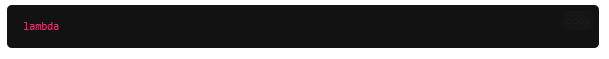

Luego, definimos la entrada para la función.  Puede haber más de una entrada, pero en nuestro caso la función solo toma una entrada: la edad del pasajero.  La edad que se pasa como una entrada a la función se llamará “x”.  Podríamos llamarlo como queramos, pero “x” es tradicional para la entrada a una función.

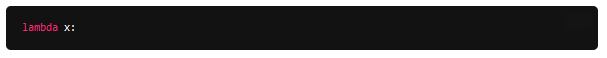

Observa que hay dos puntos (:) después de x.  Eso le dice a Python que acabamos de definir las entradas y que estamos listos para empezar a definir la declaración de retorno o las salidas.

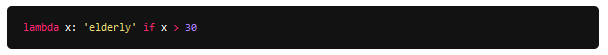

La sintaxis está un poco atrasada con respecto a si estuvieras definiendo una función persistente, pero es así como funciona con las funciones de lambda.  Primero dices cuál debería ser la salida y luego la condición.  Sin embargo, la función de lambda necesita saber qué hacer con todas las funciones, así que en este caso necesita una cláusula “else”.

Si quisiéramos cambiar los valores sobre 30 a “mayor” y dejamos el resto sin anda, debemos decirle eso en la función.

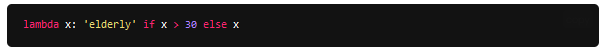

Sin embargo, queremos que cambie los valores de 30 o menos a “joven”. 

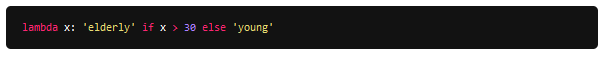

La función devolverá “mayor” si x (la edad) es más grande que 30, de lo contrario, devolverá a “joven”.

Ahora podemos pasar la función de lambda al método .apply()

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,young,1,0,A/5 21171,Cheap,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,elderly,1,0,PC 17599,Expensive,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,young,0,0,STON/O2. 3101282,Cheap,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,elderly,1,0,113803,Expensive,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,elderly,0,0,373450,Cheap,NaN,S


##Resumen

Series.apply() puede aplicar una función a cada valor en una serie.  Las funciones lambda se pueden utilizar para crear funciones rápidas de un solo uso y usar funciones personalizadas con Series.apply()